In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [6]:
con = sqlite3.connect(r'C:\Users\huynh\Python\Amazon/database.sqlite')

In [7]:
type(con)

sqlite3.Connection

In [8]:
df= pd.read_sql_query("select * from reviews", con)

In [9]:
df.shape

(568454, 10)

In [10]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [12]:
df_valid = df[df['HelpfulnessNumerator'] <=  df['HelpfulnessDenominator']]


In [13]:
df_valid.shape

(568452, 10)

In [14]:
df_valid.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
df_valid.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [16]:
df_valid.duplicated(['UserId','ProfileName','Time','Summary'])

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568452, dtype: bool

In [17]:
df_valid[df_valid.duplicated(['UserId','ProfileName','Time','Summary'])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,1231718400,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh..."
1087,1088,B0030N5K1I,A19U4T4I7UZGNM,3 dogs,1,1,1,1330992000,awful,"This is not jerky, this is processed, hard lik..."
1973,1974,B0017165OG,A2EPNS38TTLZYN,tedebear,0,0,3,1312675200,Pok Chops,The pork chops from Omaha Steaks were very tas...
2309,2310,B0001VWE0M,AQM74O8Z4FMS0,Sunshine,0,0,2,1127606400,Below standard,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...,...
568409,568410,B0018CLWM4,A2PE0AGWV6OPL7,Dark Water Mermaid,3,3,5,1309651200,Quality & affordable food,I was very pleased with the ingredient quality...
568410,568411,B0018CLWM4,A88HLWDCU57WG,R28,2,2,5,1332979200,litter box,My main reason for the five star review has to...
568411,568412,B0018CLWM4,AUX1HSY8FX55S,DAW,1,1,5,1319500800,Happy Camper,I bought this to try on two registered Maine C...
568412,568413,B0018CLWM4,AVZ2OZ479Q9E8,Ai Ling Chow,0,0,5,1336435200,Two Siberians like it!,When we brought home two 3-month-old purebred ...


In [18]:
data = df_valid.drop_duplicates(subset = ['UserId','ProfileName','Time','Summary'])

In [19]:
data.shape

(392907, 10)

In [20]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [21]:
data['Time']

0         1303862400
1         1346976000
2         1219017600
3         1307923200
4         1350777600
             ...    
568449    1299628800
568450    1331251200
568451    1329782400
568452    1331596800
568453    1338422400
Name: Time, Length: 392907, dtype: int64

In [22]:
data['time'] = pd.to_datetime(data['Time'],unit ='s')

C:\Users\huynh\AppData\Local\Temp\ipykernel_25804\330737234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['Time'],unit ='s')


In [23]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# How Amazon recommend products
## To what user Amazon can recommend more product

In [24]:
data.shape

(392907, 11)

In [25]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'time'],
      dtype='object')

In [26]:
data['ProfileName'].nunique()

218418

In [27]:
data['UserId'].nunique()


256059

In [28]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'time'],
      dtype='object')

In [29]:
data.groupby(['UserId']).agg({'Summary':'count','Text' :'count','Score' : 'mean', 'ProductId' : 'count'})

,Summary,Text,Score,ProductId
UserId,,,,
#oc-R103C0QSV1DF5E,1,1,5.000000,1
#oc-R109MU5OBBZ59U,1,1,5.000000,1
#oc-R10LFEMQEW6QGZ,1,1,5.000000,1
#oc-R10LT57ZGIB140,1,1,3.000000,1
#oc-R10UA029WVWIUI,1,1,1.000000,1
...,...,...,...,...
AZZV9PDNMCOZW,3,3,4.666667,3
AZZVNIMTTMJH6,1,1,5.000000,1
AZZY649VYAHQS,1,1,5.000000,1


In [30]:
recommend_df = data.groupby(['UserId']).agg({'Summary':'count','Text' :'count','Score' : 'mean', 'ProductId' : 'count'}).sort_values(by='ProductId', ascending=False)

In [31]:
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,281,281,4.569395,281
A281NPSIMI1C2R,260,260,4.788462,260
A1YUL9PCJR3JTY,230,230,4.591304,230
A1Z54EM24Y40LL,208,208,4.379808,208
...,...,...,...,...
A1HNV80A91JT74,1,1,2.000000,1
A1HNUQU7NWVJVZ,1,1,5.000000,1
AZZ58AJ3HJCK8,1,1,5.000000,1


In [32]:
recommend_df.columns = ['Number_of_summaries','num_text','avg_score', 'No_of_prods_purchased']

In [33]:
recommend_df

,Number_of_summaries,num_text,avg_score,No_of_prods_purchased
UserId,,,,
AY12DBB0U420B,329,329,4.659574,329
A3OXHLG6DIBRW8,281,281,4.569395,281
A281NPSIMI1C2R,260,260,4.788462,260
A1YUL9PCJR3JTY,230,230,4.591304,230
A1Z54EM24Y40LL,208,208,4.379808,208
...,...,...,...,...
A1HNV80A91JT74,1,1,2.000000,1
A1HNUQU7NWVJVZ,1,1,5.000000,1
AZZ58AJ3HJCK8,1,1,5.000000,1


In [34]:
recommend_df.index[:10]

Index(['AY12DBB0U420B', 'A3OXHLG6DIBRW8', 'A281NPSIMI1C2R', 'A1YUL9PCJR3JTY',
       'A1Z54EM24Y40LL', 'A2MUGFV2TDQ47K', 'A3D6OI36USYOU1', 'AZV26LP92E6WU',
       'AKMEY1BSHSDG7', 'A2GEZJHBV92EVR'],
      dtype='object', name='UserId')

In [35]:
recommend_df ['No_of_prods_purchased'][:10].values

array([329, 281, 260, 230, 208, 161, 142, 127, 119, 118])

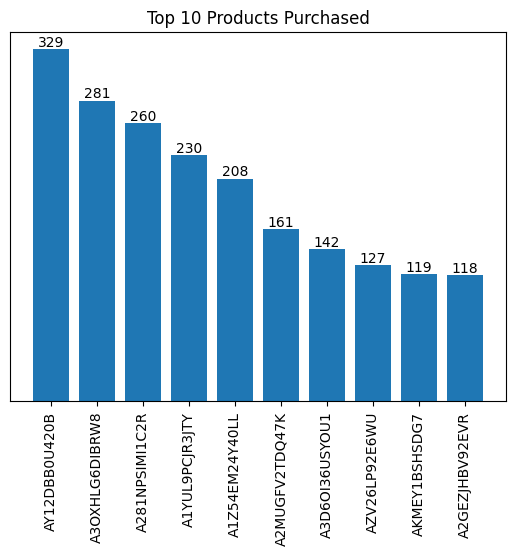

In [95]:
plt.bar(recommend_df.index[:10],recommend_df ['No_of_prods_purchased'][:10].values)
plt.bar_label(bars)
plt.xticks(rotation ='vertical')
plt.yticks([]) 
plt.title('Top 10 Products Purchased')
plt.show()


# Analysing which products has good number of Reviews

In [37]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'time'],
      dtype='object')

In [38]:
len(data['ProductId'].unique())

67562

In [39]:
prod_count = data['ProductId'].value_counts()

In [40]:
prod_count

ProductId
B007JFMH8M    912
B002QWP89S    629
B003B3OOPA    623
B001EO5Q64    566
B0013NUGDE    562
             ... 
B000JT45IA      1
B003IFB148      1
B002XO3Q52      1
B001TGY7W6      1
B0001WYNFA      1
Name: count, Length: 67562, dtype: int64

In [41]:
prod_count = data['ProductId'].value_counts().to_frame()
prod_count

,count
ProductId,
B007JFMH8M,912
B002QWP89S,629
B003B3OOPA,623
B001EO5Q64,566
B0013NUGDE,562
...,...
B000JT45IA,1
B003IFB148,1
B002XO3Q52,1


In [42]:
prod_count[prod_count['count'] >500]

,count
ProductId,
B007JFMH8M,912
B002QWP89S,629
B003B3OOPA,623
B001EO5Q64,566
B0013NUGDE,562
B000KV61FC,556
B000NMJWZO,541
B000UBD88A,536
B005K4Q37A,533


In [43]:
freq_prod_id = prod_count[prod_count['count'] >500].index
freq_prod_id

Index(['B007JFMH8M', 'B002QWP89S', 'B003B3OOPA', 'B001EO5Q64', 'B0013NUGDE',
       'B000KV61FC', 'B000NMJWZO', 'B000UBD88A', 'B005K4Q37A', 'B0090X8IPM',
       'B005ZBZLT4'],
      dtype='object', name='ProductId')

In [44]:
fre_prod_df = data[data['ProductId'].isin(freq_prod_id)]
fre_prod_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time
20982,20983,B002QWP89S,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,2011-10-18
20983,20984,B002QWP89S,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",2011-10-14
20984,20985,B002QWP89S,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",2011-09-28
20985,20986,B002QWP89S,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ...",2011-09-24
20986,20987,B002QWP89S,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...,2011-09-23
...,...,...,...,...,...,...,...,...,...,...,...
563878,563879,B007JFMH8M,A366PSH7KFLRPB,TheRosySnail,0,0,5,1343520000,Yummy!,I loved these cookies and so did my kids. You ...,2012-07-29
563879,563880,B007JFMH8M,A2KV6EYQPKJRR5,Kelley,0,0,5,1343433600,Quaker Soft Baked Cookies,This is a great tasting cookie. It is very sof...,2012-07-28
563880,563881,B007JFMH8M,A3O7REI0OSV89M,Esme,0,0,4,1343433600,Delicious!,These are great for a quick snack! They are sa...,2012-07-28
563881,563882,B007JFMH8M,A9JS5GQQ6GIQT,Syne,0,0,5,1343433600,yummy,I love the Quaker soft baked cookies. The rea...,2012-07-28


In [45]:
fre_prod_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'time'],
      dtype='object')

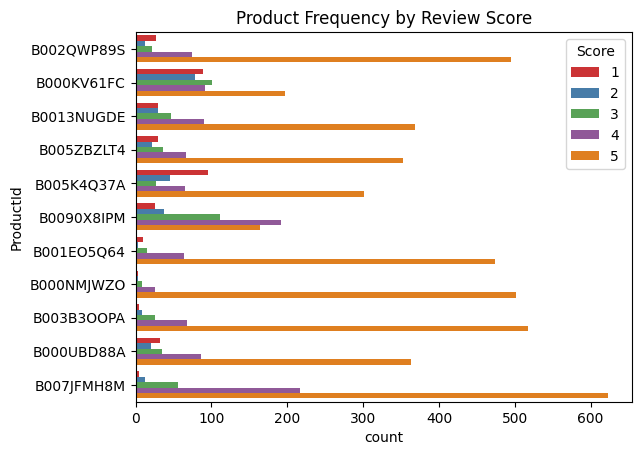

In [119]:
sns.countplot(y = 'ProductId', data = fre_prod_df, hue = 'Score',palette ='Set1' )
plt.title('Product Frequency by Review Score')
plt.show()

# Is there difference between behaviour of frequent viewer and not frequent viewers?


In [47]:
x =data['UserId'].value_counts()
x

UserId
AY12DBB0U420B     329
A3OXHLG6DIBRW8    281
A281NPSIMI1C2R    260
A1YUL9PCJR3JTY    230
A1Z54EM24Y40LL    208
                 ... 
AEW1UWTI3MCVN       1
ALMANY3CKWVH7       1
A1UJMVE0LCOI45      1
A6RFVZFCCPPAB       1
A2RM8BU1FCYQM9      1
Name: count, Length: 256059, dtype: int64

In [48]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21


In [49]:
data ['viewer_type'] = data['UserId'].apply(lambda user : 'Frequent' if x[user] > 50 else 'Not Frequent')

In [50]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,Not Frequent


In [51]:
not_freq_df = data[data['viewer_type'] =='Not Frequent']
not_freq_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,viewer_type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Not Frequent
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,Not Frequent
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,Not Frequent
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Not Frequent
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09,Not Frequent
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09,Not Frequent
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21,Not Frequent
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13,Not Frequent


In [52]:
freq_df = data[data['viewer_type'] =='Frequent']
freq_df


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,viewer_type
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,2010-03-12,Frequent
44,45,B001EO5QW8,A2G7B7FKP2O2PU,D. Leschke,0,0,5,1209686400,Great taste and convenience,We really like the McCann's steel cut oats but...,2008-05-02,Frequent
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,1192752000,good,Good oatmeal. I like the apple cinnamon the b...,2007-10-19,Frequent
109,110,B001REEG6C,AY12DBB0U420B,Gary Peterson,0,0,5,1316390400,My Idea of a Good Diet Food.,I'm presently on a diet and I was at my Fresh ...,2011-09-19,Frequent
141,142,B001GVISJW,A2YIO225BTKVPU,"Angel_Boy ""Treat the people around you the wa...",0,0,4,1301788800,Good Licorice,Twizzlers brand licorice is much better than t...,2011-04-03,Frequent
...,...,...,...,...,...,...,...,...,...,...,...,...
568238,568239,B002OXLXLG,A1Z54EM24Y40LL,c2,0,0,5,1310601600,Great replacement for the Girl Scout version!,If you failed to purchase enough of the Mint G...,2011-07-14,Frequent
568261,568262,B00374ZKQ0,A2GEZJHBV92EVR,History buff,0,0,5,1345075200,Very good alternative to sugar.,I have tried many of the no sugar sweeteners o...,2012-08-16,Frequent
568317,568318,B0013Z0PTW,A1ODOGXEYECQQ8,Nuknuk,0,0,4,1226880000,Good Tasting Granola Bars,Most health bars taste awful. Fiber One Grano...,2008-11-17,Frequent
568331,568332,B001BOAOLY,A36MP37DITBU6F,"Enchanted In Dixie ""Enchanted""",6,6,4,1244419200,GREAT ORGANIC Honey flavor Hard candy. Great c...,These are delicious organic hard candies. I on...,2009-06-08,Frequent


In [53]:
freq_df['Score'].value_counts()

Score
5    5627
4    1949
3     891
2     354
1     317
Name: count, dtype: int64

In [54]:
freq_df['Score'].value_counts()/len(freq_df)*100

Score
5    61.578026
4    21.328518
3     9.750492
2     3.873933
1     3.469030
Name: count, dtype: float64

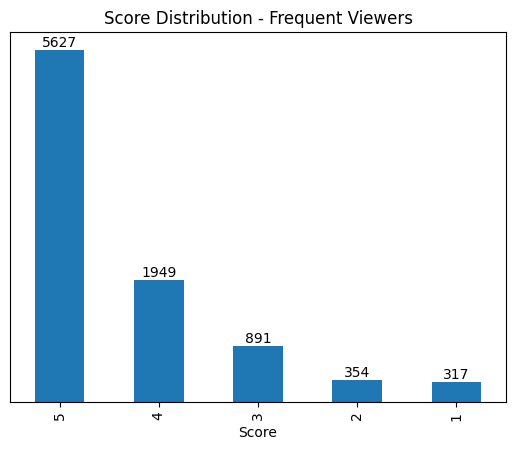

In [103]:
fig = freq_df['Score'].value_counts().plot(kind='bar')
fig.bar_label(fig.containers[0])  
plt.title('Score Distribution - Frequent Viewers')
plt.yticks([])
plt.show()

In [56]:
not_freq_df['Score'].value_counts()/len(not_freq_df)*100

Score
5    63.736519
4    14.073049
1     9.363966
3     7.508423
2     5.318043
Name: count, dtype: float64

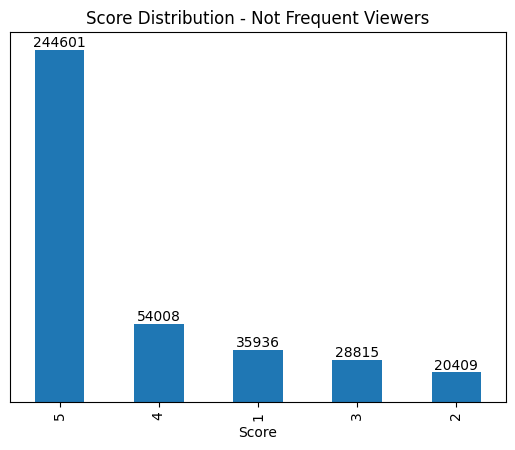

In [104]:
fig = not_freq_df['Score'].value_counts().plot(kind='bar')
fig.bar_label(fig.containers[0])  # This puts labels above bars
plt.title('Score Distribution - Not Frequent Viewers')
plt.yticks([])
plt.show()

# Analysing frequent Users
## Are frequent user more verbose?

In [58]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'time',
       'viewer_type'],
      dtype='object')

In [59]:
data['Text']

0         I have bought several of the Vitality canned d...
1         Product arrived labeled as Jumbo Salted Peanut...
2         This is a confection that has been around a fe...
3         If you are looking for the secret ingredient i...
4         Great taffy at a great price.  There was a wid...
                                ...                        
568449    Great for sesame chicken..this is a good if no...
568450    I'm disappointed with the flavor. The chocolat...
568451    These stars are small, so you can give 10-15 o...
568452    These are the BEST treats for training and rew...
568453    I am very satisfied ,product is as advertised,...
Name: Text, Length: 392907, dtype: object

In [60]:
data[['UserId','ProductId','Text']]

,UserId,ProductId,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,I have bought several of the Vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,This is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,If you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,Great taffy at a great price. There was a wid...
...,...,...,...
568449,A28KG5XORO54AY,B001EO7N10,Great for sesame chicken..this is a good if no...
568450,A3I8AFVPEE8KI5,B003S1WTCU,I'm disappointed with the flavor. The chocolat...
568451,A121AA1GQV751Z,B004I613EE,"These stars are small, so you can give 10-15 o..."
568452,A3IBEVCTXKNOH,B004I613EE,These are the BEST treats for training and rew...


In [61]:
data['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [62]:
type(data['Text'][0])

str

In [63]:
len(data['Text'][0].split(' '))

49

In [64]:
def calculate_length(text):
    return len(text.split(' '))

In [65]:
data['Text_length'] = data['Text'].apply(calculate_length)
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21,Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13,Not Frequent,37


In [66]:
data['viewer_type'].unique()

array(['Not Frequent', 'Frequent'], dtype=object)

In [67]:
freq_data = data[data['viewer_type'] =='Frequent']
not_freq_data = data[data['viewer_type'] =='Not Frequent']


In [68]:
not_freq_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,time,viewer_type,Text_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,Not Frequent,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,Not Frequent,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,Not Frequent,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,Not Frequent,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,Not Frequent,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,2011-03-09,Not Frequent,26
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,2012-03-09,Not Frequent,46
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",2012-02-21,Not Frequent,71
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,2012-03-13,Not Frequent,37


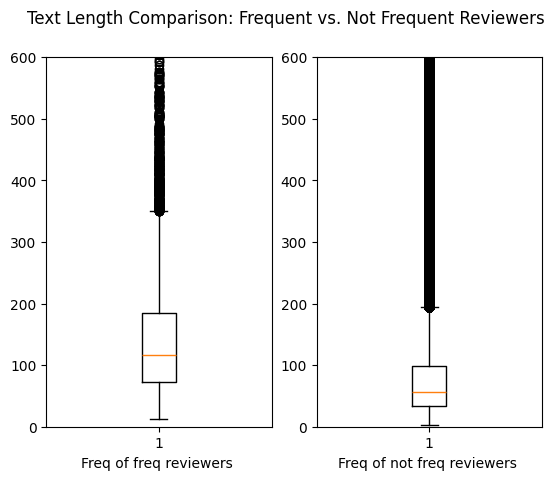

In [106]:
fig = plt.figure()
ax1= fig.add_subplot(121)
ax1.boxplot(freq_data['Text_length'])
ax1.set_xlabel ('Freq of freq reviewers ')
ax1.set_ylim(0,600)

ax2 = fig.add_subplot(122)
ax2.boxplot(not_freq_data['Text_length'])
ax2.set_xlabel ('Freq of not freq reviewers ')
ax2.set_ylim(0,600)

fig.suptitle('Text Length Comparison: Frequent vs. Not Frequent Reviewers')
plt.show()



# Perform Sentiment Analysis on data


In [70]:
!pip install textblob

In [71]:
from textblob import TextBlob

In [72]:
data['Summary'][0]

'Good Quality Dog Food'

In [73]:
TextBlob('Good Quality Dog Food').sentiment.polarity

0.7

In [74]:
sample = data[:50000]

In [75]:
def get_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0
sample['polarity'] = sample['Summary'].apply(get_polarity)
sample['polarity'].size


50000

In [76]:
sample_negative = sample[sample['polarity']<0]

In [77]:
sample_positive = sample[sample['polarity']>0]

In [78]:
from collections import Counter

In [108]:
word_counts = Counter(sample_negative['Summary']).most_common(10)
word_counts

[('Disappointed', 44),
 ('Disappointing', 32),
 ('Bland', 18),
 ('Awful', 17),
 ('Not what I expected', 17),
 ('disappointed', 16),
 ('Terrible', 15),
 ('Horrible', 15),
 ('Disgusting', 12),
 ('not good', 11)]

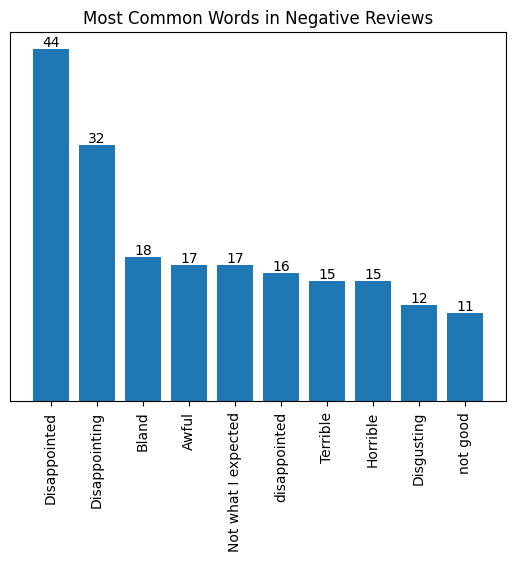

In [115]:
words = [i[0] for i in word_counts]
counts = [i[1] for i in word_counts]
bars = plt.bar(words,counts)
plt.bar_label(bars)
plt.xticks(rotation ='vertical')
plt.yticks([]) 
plt.title('Most Common Words in Negative Reviews')
plt.show()

In [117]:
word_counts = Counter(sample_positive['Summary']).most_common(10)
word_counts

[('Delicious!', 208),
 ('Delicious', 203),
 ('Great product', 100),
 ('Excellent', 85),
 ('Love it!', 81),
 ('Great', 81),
 ('Great Product', 78),
 ('Great!', 70),
 ('Awesome', 50),
 ('Good stuff', 50)]

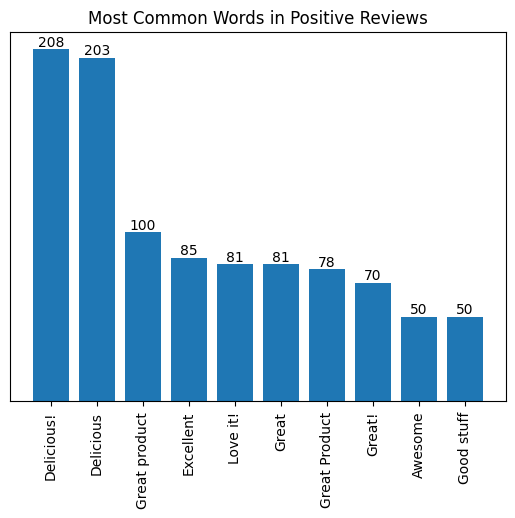

In [118]:
words = [i[0] for i in word_counts]
counts = [i[1] for i in word_counts]
bars = plt.bar(words,counts)
plt.bar_label(bars)
plt.xticks(rotation ='vertical')
plt.yticks([]) 
plt.title('Most Common Words in Positive Reviews')
plt.show()